In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Trip Table  FOR PAYOR'S ANALYSIS

In [2]:
trip_data = pd.read_csv('data/2_Table_includes_QMC_clients_name_and_Number_of_trips_completed_b_PIT-2017_to_2019.csv', delimiter=",", encoding='latin1')
trip_data.head(3)

,Trip date,Job Number,Client Code,Client Name,Status Desc,Priority Descr,Call Type Descr,Payor1 Code,Payor1 Name,Payor Type,...,Dropoff Zip,Miles,Pickup Zone,Dropoff Zone,Trip Dropoff Status,Total Charges for Trip,Total Credit for Trip,Billed,In_Collection,Narative
0,1/1/2017,0432-A,57,Augusta Health Care Inc,Closed,Non-Emergency,BLS,4,Bill Patient,Bill Patient,...,22408-7762,99.0,1,1,7,131900,131900,1,Yes,in patient mental health eval
1,1/1/2017,0438-A,30,Lexington EMS,Closed,Emergency,BLS,5143,Shenandoah Life Insurance (10854),Insurance,...,24450-2448,0.4,1,1,7,48260,48260,1,No,NaN
2,1/1/2017,0439-A,49,Lower Valley Ambulance Service,Closed,Emergency,BLS,4,Bill Patient,Bill Patient,...,15065-1152,12.0,1,1,0,73242,73242,1,Yes,NaN


In [3]:
trip_data.columns

Index(['Trip date', 'Job Number', 'Client Code', 'Client Name', 'Status Desc',
       'Priority Descr', 'Call Type Descr', 'Payor1 Code', 'Payor1 Name',
       'Payor Type', 'Primary Payor', '4th Payor', 'Pickup City',
       'Pickup State', 'Pickup Zip', 'Dropoff City', 'Dropoff State',
       'Dropoff Zip', 'Miles', 'Pickup Zone', 'Dropoff Zone',
       'Trip Dropoff Status', 'Total Charges for Trip',
       'Total Credit for Trip', 'Billed', 'In_Collection', 'Narative'],
      dtype='object')

In [3]:
print(f'\nThe trip_data table contains {trip_data.shape[0]} samples and {trip_data.shape[1]} variables')


The trip_data table contains 785340 samples and 27 variables


In [4]:
#trip_data.isnull().sum()

In [6]:
#trip_data.dtypes

In [19]:
trip_data['Payor1 Name'].nunique()

2717

In [53]:
#trip_data['Narative'].value_counts()

In [5]:
# drop rows when charge column contains a Null value
trip_data.dropna(subset=['Payor Type', '4th Payor', 'Pickup City', 'Pickup State', 'Pickup Zip', 'Dropoff City', 'Dropoff State', 'Dropoff Zip', 'Narative'], how='any', inplace=True)

In [128]:
#trip_data.isnull().sum()

In [6]:
# convert column to datetime format
trip_data['Trip date'] = pd.to_datetime(trip_data['Trip date'])

In [7]:
# Create new columns
trip_data['month'] = trip_data['Trip date'].dt.month 
trip_data['Year'] = trip_data['Trip date'].dt.year

In [8]:
# filter data between 2019 

trip_data_2 = trip_data['Year'].isin(['2019'])
trip_data_2019 = trip_data.loc[trip_data_2]
#trip_data_2019.tail()

### Trip Table Extraction

In [9]:
#trip_data_table_ext = trip_data[['Trip date', 'month', 'Year', 'Priority Descr', 'Status Desc', 'Payor Type', 'Total Charges for Trip', 'Total Credit for Trip']]
#trip_data_table_ext.head()
trip_data_ext = trip_data_2019[['month', 'Client Name', 'Payor1 Name', 'Status Desc', 'Payor Type', 'Total Charges for Trip']]
#trip_data_ext.head()

In [10]:
# Extract data where status Desc== Billed

trip_data_tab = trip_data_ext['Status Desc'].isin(['Billed'])
trip_data_tab_2019 = trip_data_ext.loc[trip_data_tab]
trip_data_tab_2019.sample(10)

,month,Client Name,Payor1 Name,Status Desc,Payor Type,Total Charges for Trip
672716,9,Guardian Air,AHCCCS UHC COMMUNITY PLAN (5290),Billed,Medicaid,6740052
651435,8,Lehigh Valley Hospital Inc,Bill Patient,Billed,Bill Patient,420850
726562,11,Guardian Medical Transport,GG TUBA CITY 5015,Billed,Insurance,301497
740647,11,Augusta Health Care Inc,CIGNA MEDICARE SUPPLEMENT SOLUTIONS,Billed,Insurance,37830
703497,10,Canonsburg General Hospital Ambulance Service,Bill Patient,Billed,Bill Patient,8700
448895,1,EMS OF LEFLORE COUNTY,Bill Patient,Billed,Bill Patient,143050
783194,12,Norton Health Care d/b/a Just for Kids,ANTHEM B/C OH COMMERCIAL,Billed,Insurance,599100
603824,6,Cooper University Healthcare,Medicare NJ Urban 99,Billed,Medicare,123500
729346,11,PASCO PINELLAS HILLSBOROUGH CO,Bill Patient,Billed,Bill Patient,156774
573929,5,Guardian Medical Transport,AHCCCS CARE FIRST OF AZ (31224),Billed,Medicaid,453394


In [16]:
# Total Charges for trip 2019
#top_payor_2019_data['Avg. Total Charges for Trip'].mean()

In [20]:
trip_data_tab_2019.nunique()

month                       12
Client Name                 86
Payor1 Name                688
Status Desc                  1
Payor Type                   6
Total Charges for Trip    2637
dtype: int64

In [11]:
# group by Payor1 Name
grp_trip_data_2019 = trip_data_tab_2019.groupby('Payor1 Name')['Total Charges for Trip'].sum()
type(grp_trip_data_2019)

pandas.core.series.Series

In [12]:
df_grp_trip_data_2019 = grp_trip_data_2019.to_frame().reset_index()

In [16]:
df_grp_trip_data_2019_2 = df_grp_trip_data_2019.nlargest(5, ['Total Charges for Trip'])
#df_grp_trip_data_2019_2

In [17]:
df_grp_trip_data_2019.shape

(688, 2)

In [32]:
# Create a new row and make it a dataframe and make the name of the under the column aas others and do a summation
# on the value other rows
new_row2 = pd.DataFrame(data = {
    'Payor1 Name' : ['others'],
    'Total Charges for Trip' : [df_grp_trip_data_2019_2['Total Charges for Trip'][5:].sum()]
})

In [33]:
new_row2

,Payor1 Name,Total Charges for Trip
0,others,2413798515


In [37]:
#combining top 5 with others
df2 = pd.concat([df_grp_trip_data_2019_2, new_row2])

In [38]:
df2

,Payor1 Name,Total Charges for Trip
124,Bill Patient,891576414
240,GG TUBA CITY 5015,170040718
23,AHCCCS AMERICAN IND 6000,138177473
277,HORIZON BC BS OF NEW JERSEY (Inst),93883500
575,UNITED HEALTHCARE COMMUNITY (8207),74006250
0,others,2413798515


<Figure size 1080x576 with 0 Axes>

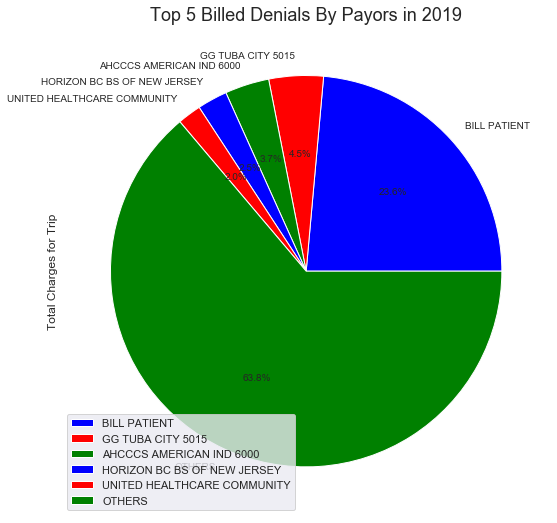

In [44]:
plt.figure(figsize=(15,8))
my_labels = 'BILL PATIENT','GG TUBA CITY 5015','AHCCCS AMERICAN IND 6000','HORIZON BC BS OF NEW JERSEY','UNITED HEALTHCARE COMMUNITY', 'OTHERS'
my_colors = ['blue','red','green']
df2.plot.pie(y='Total Charges for Trip', labels=my_labels, autopct='%1.1f%%', legend = False, colors = my_colors, fontsize=10, 
                               figsize=(18, 9))

plt.title('Top 5 Billed Denials By Payors in 2019', size=18)
plt.savefig('Top 5 Billed Denials By Payors 2019.png', dpi=300, bbox_inches='tight')
plt.legend(loc='best')
#plt.legend(MyCoding, bbox_to_anchor=(1.05, 1))
plt.show()

In [46]:
# filter data by top 5 payors

trip_data_payor_2019 = trip_data_tab_2019['Payor1 Name'].isin(['Bill Patient', 'GG TUBA CITY 5015', 'AHCCCS AMERICAN IND 6000', 'HORIZON BC BS OF NEW JERSEY (Inst)', 'UNITED HEALTHCARE COMMUNITY (8207)'])
top_payor_2019_data = trip_data_tab_2019.loc[trip_data_payor_2019]
top_payor_2019_data.tail()

,month,Client Name,Payor1 Name,Status Desc,Payor Type,Total Charges for Trip
784513,12,EMS OF LEFLORE COUNTY,Bill Patient,Billed,Bill Patient,369024
784726,12,PASCO PINELLAS HILLSBOROUGH CO,Bill Patient,Billed,Bill Patient,119526
784789,12,Medical Rescue Team South Authority,Bill Patient,Billed,Bill Patient,118950
784987,12,Guardian Medical Transport,Bill Patient,Billed,Bill Patient,878203
785132,12,Children's Hospital Medical Center Of Akron,UNITED HEALTHCARE COMMUNITY (8207),Billed,Medicaid,565950


In [47]:
# filter by month
Jan_payor_2019 = top_payor_2019_data['month'].isin(['1'])
Jan_payor_data_2019 = top_payor_2019_data.loc[Jan_payor_2019]
#Jan_payor_data_2019.tail()

feb_payor_2019 = top_payor_2019_data['month'].isin(['2'])
feb_payor_data_2019 = top_payor_2019_data.loc[feb_payor_2019]
#feb_payor_data_2019.sample(9)

mar_payor_2019 = top_payor_2019_data['month'].isin(['3'])
mar_payor_data_2019 = top_payor_2019_data.loc[mar_payor_2019]
#mar_payor_data_2019.tail()

Apr_payor_2019 = top_payor_2019_data['month'].isin(['4'])
Apr_payor_data_2019 = top_payor_2019_data.loc[Apr_payor_2019]
#Apr_payor_data_2019.sample(9)

may_payor_2019 = top_payor_2019_data['month'].isin(['5'])
may_payor_data_2019 = top_payor_2019_data.loc[may_payor_2019]
#may_payor_data_2019.tail()

June_payor_2019 = top_payor_2019_data['month'].isin(['6'])
June_payor_data_2019 = top_payor_2019_data.loc[June_payor_2019]
#June_payor_data_2019.sample(9)

jul_payor_2019 = top_payor_2019_data['month'].isin(['7'])
jul_payor_data_2019 = top_payor_2019_data.loc[jul_payor_2019]
#jul_payor_data_2019.tail()

Aug_payor_2019 = top_payor_2019_data['month'].isin(['8'])
Aug_payor_data_2019 = top_payor_2019_data.loc[Aug_payor_2019]
#Aug_payor_data_2019.sample()

sep_payor_2019 = top_payor_2019_data['month'].isin(['9'])
sep_payor_data_2019 = top_payor_2019_data.loc[sep_payor_2019]
#sep_payor_data_2019.tail()

oct_payor_2019 = top_payor_2019_data['month'].isin(['10'])
oct_payor_data_2019 = top_payor_2019_data.loc[oct_payor_2019]
#oct_payor_data_2019.sample(9)

nov_payor_2019 = top_payor_2019_data['month'].isin(['11'])
nov_payor_data_2019 = top_payor_2019_data.loc[nov_payor_2019]
#nov_payor_data_2019.tail()

dec_payor_2019 = top_payor_2019_data['month'].isin(['12'])
dec_payor_data_2019 = top_payor_2019_data.loc[dec_payor_2019]
dec_payor_data_2019.sample(9)

,month,Client Name,Payor1 Name,Status Desc,Payor Type,Total Charges for Trip
770339,12,PASCO PINELLAS HILLSBOROUGH CO,Bill Patient,Billed,Bill Patient,121158
769102,12,Lehigh Valley Hospital Inc,Bill Patient,Billed,Bill Patient,99000
761984,12,Guardian Medical Transport,GG TUBA CITY 5015,Billed,Insurance,147493
768763,12,PASCO PINELLAS HILLSBOROUGH CO,Bill Patient,Billed,Bill Patient,125610
774677,12,Guardian Air,Bill Patient,Billed,Bill Patient,5609840
764341,12,North East Mobile Health Svcs,Bill Patient,Billed,Bill Patient,131160
782082,12,EMS OF LEFLORE COUNTY,Bill Patient,Billed,Bill Patient,365336
780931,12,EMS OF LEFLORE COUNTY,Bill Patient,Billed,Bill Patient,267604
771027,12,EMS OF LEFLORE COUNTY,Bill Patient,Billed,Bill Patient,192000


In [48]:
grp_jan_data_2019 = Jan_payor_data_2019.groupby('Payor1 Name')['Total Charges for Trip'].sum()
grp_jan_data_2019

grp_feb_data_2019 = feb_payor_data_2019.groupby('Payor1 Name')['Total Charges for Trip'].sum()
grp_feb_data_2019

grp_mar_data_2019 = mar_payor_data_2019.groupby('Payor1 Name')['Total Charges for Trip'].sum()
grp_mar_data_2019

grp_apr_data_2019 = Apr_payor_data_2019.groupby('Payor1 Name')['Total Charges for Trip'].sum()
grp_apr_data_2019

grp_may_data_2019 = may_payor_data_2019.groupby('Payor1 Name')['Total Charges for Trip'].sum()
grp_may_data_2019

grp_june_data_2019 = June_payor_data_2019.groupby('Payor1 Name')['Total Charges for Trip'].sum()
grp_june_data_2019

grp_jul_data_2019 = jul_payor_data_2019.groupby('Payor1 Name')['Total Charges for Trip'].sum()
grp_jul_data_2019

grp_Aug_data_2019 = Aug_payor_data_2019.groupby('Payor1 Name')['Total Charges for Trip'].sum()
grp_Aug_data_2019

grp_sep_data_2019 = sep_payor_data_2019.groupby('Payor1 Name')['Total Charges for Trip'].sum()
grp_sep_data_2019

grp_oct_data_2019 = oct_payor_data_2019.groupby('Payor1 Name')['Total Charges for Trip'].sum()
grp_oct_data_2019

grp_nov_data_2019 = nov_payor_data_2019.groupby('Payor1 Name')['Total Charges for Trip'].sum()
grp_nov_data_2019

grp_dec_data_2019 = dec_payor_data_2019.groupby('Payor1 Name')['Total Charges for Trip'].sum()
grp_dec_data_2019

Payor1 Name
AHCCCS AMERICAN IND 6000               11609056
Bill Patient                          106187808
GG TUBA CITY 5015                       5505097
HORIZON BC BS OF NEW JERSEY (Inst)      3624750
UNITED HEALTHCARE COMMUNITY (8207)      9974550
Name: Total Charges for Trip, dtype: int64

In [49]:
# convert series into dataframe and reset index
df_grp_jan = grp_jan_data_2019.to_frame().reset_index()
jan_charge = df_grp_jan.rename(columns={'Total Charges for Trip':' Jan Total Charges for Trip 2019'})

df_grp_feb = grp_feb_data_2019.to_frame().reset_index()
feb_charge = df_grp_feb.rename(columns={'Total Charges for Trip':' Feb Total Charges for Trip 2019'})

df_grp_mar = grp_mar_data_2019.to_frame().reset_index()
Mar_charge = df_grp_mar.rename(columns={'Total Charges for Trip':' Mar Total Charges for Trip 2019'})

df_grp_apr = grp_apr_data_2019.to_frame().reset_index()
April_charge = df_grp_apr.rename(columns={'Total Charges for Trip':' April Total Charges for Trip 2019'})

df_grp_may = grp_may_data_2019.to_frame().reset_index()
May_charge = df_grp_may.rename(columns={'Total Charges for Trip':' May Total Charges for Trip 2019'})

df_grp_june = grp_june_data_2019.to_frame().reset_index()
June_charge = df_grp_june.rename(columns={'Total Charges for Trip':' June Total Charges for Trip 2019'})

df_grp_jul = grp_jul_data_2019.to_frame().reset_index()
July_charge = df_grp_jul.rename(columns={'Total Charges for Trip':' July Total Charges for Trip 2019'})

df_grp_Aug = grp_Aug_data_2019.to_frame().reset_index()
Aug_charge = df_grp_Aug.rename(columns={'Total Charges for Trip':' Aug Total Charges for Trip 2019'})

df_grp_sep = grp_sep_data_2019.to_frame().reset_index()
Sep_charge = df_grp_sep.rename(columns={'Total Charges for Trip':' Sep Total Charges for Trip 2019'})

df_grp_oct = grp_oct_data_2019.to_frame().reset_index()
Oct_charge = df_grp_oct.rename(columns={'Total Charges for Trip':' Oct Total Charges for Trip 2019'})

df_grp_nov = grp_nov_data_2019.to_frame().reset_index()
Nov_charge = df_grp_nov.rename(columns={'Total Charges for Trip':' Nov Total Charges for Trip 2019'})

df_grp_dec = grp_dec_data_2019.to_frame().reset_index()
Dec_charge = df_grp_dec.rename(columns={'Total Charges for Trip':' Nov Total Charges for Trip 2019'})
feb_charge

,Payor1 Name,Feb Total Charges for Trip 2019
0,Bill Patient,40102429
1,GG TUBA CITY 5015,11382861
2,HORIZON BC BS OF NEW JERSEY (Inst),5109750
3,UNITED HEALTHCARE COMMUNITY (8207),7368050


In [50]:
#merge files
jan_feb_merge = pd.merge(jan_charge, feb_charge)
jan_feb_merge

Mar_Apr_merge = pd.merge(Mar_charge, April_charge)
Mar_Apr_merge

May_June_merge = pd.merge(May_charge, June_charge)
May_June_merge

July_Aug_merge = pd.merge(July_charge, Aug_charge)
July_Aug_merge

Sep_Oct_merge = pd.merge(Sep_charge, Oct_charge)
Sep_Oct_merge


,Payor1 Name,Sep Total Charges for Trip 2019,Oct Total Charges for Trip 2019
0,AHCCCS AMERICAN IND 6000,5857096,4440202
1,Bill Patient,96499739,103020956
2,GG TUBA CITY 5015,6730536,1752522
3,HORIZON BC BS OF NEW JERSEY (Inst),3645000,10336500
4,UNITED HEALTHCARE COMMUNITY (8207),3346550,4879350


In [55]:
First_Quarter_TotalCharge = pd.merge(jan_feb_merge, Mar_Apr_merge)
First_Quarter_TotalCharge

,Payor1 Name,Jan Total Charges for Trip 2019,Feb Total Charges for Trip 2019,Mar Total Charges for Trip 2019,April Total Charges for Trip 2019
0,Bill Patient,52365826,40102429,58192390,41103587
1,GG TUBA CITY 5015,27420768,11382861,23780421,20611503
2,HORIZON BC BS OF NEW JERSEY (Inst),6646500,5109750,3150000,3420000
3,UNITED HEALTHCARE COMMUNITY (8207),13629750,7368050,6248450,4817600


In [52]:
# Avg Bill Charge
First_Quarter_TotalCharge['Avg. Billed Charge 2019'] = First_Quarter_TotalCharge.mean(axis=1)

In [56]:
First_Quarter_TotalCharge

,Payor1 Name,Jan Total Charges for Trip 2019,Feb Total Charges for Trip 2019,Mar Total Charges for Trip 2019,April Total Charges for Trip 2019
0,Bill Patient,52365826,40102429,58192390,41103587
1,GG TUBA CITY 5015,27420768,11382861,23780421,20611503
2,HORIZON BC BS OF NEW JERSEY (Inst),6646500,5109750,3150000,3420000
3,UNITED HEALTHCARE COMMUNITY (8207),13629750,7368050,6248450,4817600


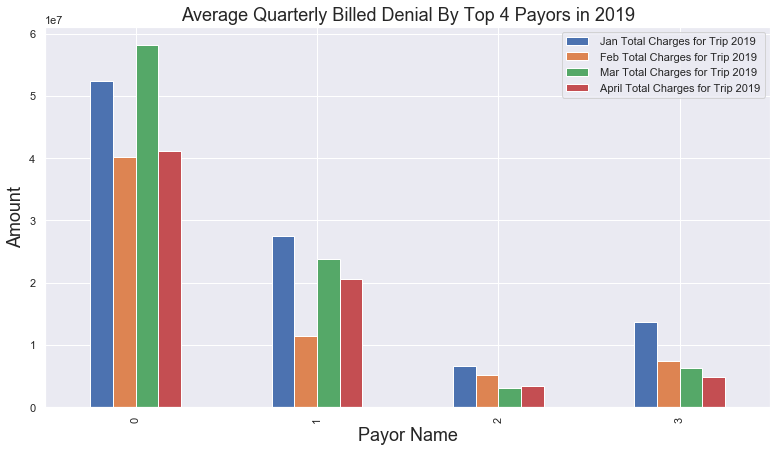

In [57]:
First_Quarter_TotalCharge.plot(kind='bar', figsize=(13,7))
plt.title('Average Quarterly Billed Denial By Top 4 Payors in 2019', size=18)
plt.xlabel('Payor Name', size=18)
plt.ylabel('Amount', size=18)
plt.savefig('Average Quarterly Billed Denial By Top 4 Payors in 2019.png', dpi=300, bbox_inches='tight')
plt.legend(loc='best')
#plt.legend(MyCoding, bbox_to_anchor=(1.05, 1))
plt.show()

### Reasons For which Most Bill Patient Denial.

In [205]:
# filter data by top denial codes

#reason_code_table = denial_code_table_ext_data['Denial Code'].isin(['Bill Patient', '1055', '88', '541', '2298'])
#reason_code_table_data = denial_code_table_ext_data.loc[reason_code_table]
#reason_code_table_data.tail()
denial_code_table_ext_data.head()

,Year,month,Client,Payor,Denial Code,Charge,Denial Reason Code,Denial Reason Descr,Total Charge 2019
89712,2019,1,Bethlehem Township Volunteer Fire Company,AmeriHealth Caritas PA Medical Assistance,3494,1700.0,Z99,Procedure code not payable for provider specia...,35922662.0
89713,2019,1,Bethlehem Township Volunteer Fire Company,AmeriHealth Caritas PA Medical Assistance,3494,1574.0,Z99,Procedure code not payable for provider specia...,35922662.0
89714,2019,1,Cooper University Healthcare,Horizon NJ Total Care (HMO SNP UB),1055,1227.0,CO16,Claim lacks information needed for adjudication,35922662.0
89715,2019,1,Cooper University Healthcare,Horizon NJ Total Care (HMO SNP UB),1055,1230.0,CO16,Claim lacks information needed for adjudication,35922662.0
89716,2019,1,Cooper University Healthcare,Horizon NJ Total Care (HMO SNP UB),1055,1227.0,CO16,Claim lacks information needed for adjudication,35922662.0


### Denial Table for DENIAL CODE Analysis

In [58]:
client_denial_info = pd.read_csv('data/5_Tables_that_includes_denial_information_by_client_and_payor_type.csv')
client_denial_info.sample(5)

,Trip Date,Job Number,Database,Client Code,Client,Service Type: Name,Market Type,Payor Code,Payor,Trip Status,Call Type,Response Priority,Charge,Post Date,Check Date,Deposit Date,Batch Number,Denial Code,Denial Reason Code,Denial Reason Descr
308357,3/13/2018,0096-A,CTA,17,SEYMOUR AMBULANCE ASSOCIATION INC.,Ground Transport,Private : For- Profit,121,Connecticut State Welfare,Closed,BLS-Emergency,"Emergency, - Lights and Sirens",111.0,5/17/2018,5/8/2018,5/8/2018,51881,106,CO22,Payment adjusted because this care may be cove...
60831,7/10/2018,0763-A,PIT,105,New Kensington Ambulance,Ground Transport,Municipal: Third Service (EMS),11407,PA Health and Wellness (Medicaid),Closed,BLS,Emergency,0.0,11/5/2018,NaN,10/31/2018,0,3421,600,"The provider identification, tax identificatio..."
177663,1/5/2020,0640-A,PIT,112,Clarion Hospital EMS,Ground Transport,Hospital-based,8251,UHC COMMUNITY CARE M-CAID,Closed,BLS,Emergency,0.0,2/4/2020,NaN,1/29/2020,0,3003,252,The disposition of the claim/service is undete...
42282,2/16/2018,0213-A,PIT,35,WCA Services Corporation,Ground Transport,Municipal: Fire Based,7692,04-Cattaraugus Co Medicaid,Closed,ALS,Emergency,0.0,3/15/2018,2/26/2018,3/15/2018,0,2820,131,Recipient has other insurance; bill primary ca...
71287,9/17/2018,0625-A,PIT,105,New Kensington Ambulance,Ground Transport,Municipal: Third Service (EMS),1853,Highmark BC/BS (890062),Closed,ALS,Emergency,0.0,1/2/2019,NaN,12/26/2018,0,1668,L5015,We do not pay for servIces paid or payable by ...


In [42]:
# client_denial_info.isnull().sum()

In [59]:
client_denial_info.dropna(subset=['Service Type: Name', 'Market Type', 'Charge', 'Check Date', 'Denial Reason Code'], how='any', inplace=True)

In [60]:
client_denial_info.columns

Index(['Trip Date', 'Job Number', 'Database', 'Client Code', 'Client',
       'Service Type: Name', 'Market Type', 'Payor Code', 'Payor',
       'Trip Status', 'Call Type', 'Response Priority', 'Charge', 'Post Date',
       'Check Date', 'Deposit Date', 'Batch Number', 'Denial Code',
       'Denial Reason Code', 'Denial Reason Descr'],
      dtype='object')

In [61]:
client_denial_info['Service Type: Name'].value_counts()

Ground Transport                      122488
Air and Ground Transport               19004
Air Transport                          14234
0                                        206
Ground Transport and Fire Response        47
Name: Service Type: Name, dtype: int64

In [49]:
# Confirm null values where deleted
#client_denial_info.isnull().sum()

In [62]:
# convert column to datetime format
client_denial_info['Trip Date'] = pd.to_datetime(client_denial_info['Trip Date'])

In [63]:
# Create new columns
client_denial_info['month'] = client_denial_info['Trip Date'].dt.month 
client_denial_info['Year'] = client_denial_info['Trip Date'].dt.year

### Denial Table Extraction

In [64]:
#denial_code_table_ext = client_denial_info[['month', 'Year', 'Client', 'Payor', 'Denial Code', 'Charge', 'Denial Reason Code', 'Denial Reason Descr']]
#denial_code_table_ext.head()

denial_code_table_ext = client_denial_info[['Year', 'month', 'Client', 'Payor', 'Denial Code', 'Charge', 'Denial Reason Code', 'Denial Reason Descr']]
#denial_code_table_ext.head()

In [65]:
# filter data between 2017 and 2021 which are in PIT database

denial_code_table_ext_2 = denial_code_table_ext['Year'].isin(['2019'])
denial_code_table_ext_data = denial_code_table_ext.loc[denial_code_table_ext_2]
denial_code_table_ext_data.tail()

,Year,month,Client,Payor,Denial Code,Charge,Denial Reason Code,Denial Reason Descr
421152,2019,12,Anamosa Area Ambulance Service,BCBS IA - Wellmark,88,892.0,OA18,Duplicate claim/service.
421158,2019,12,Champion EMS,Humana - Medicare,111,813.0,CO23,Payment adjusted due to the impact of prior pa...
421171,2019,12,West Platte Fire Protection District,Medicare MO Part B,541,0.0,CO109,Claim not covered by this payer/contractor. Yo...
421195,2019,12,Champion EMS,Medicaid TX,76,590.0,CO16,Claim/service lacks information which is neede...
421198,2019,12,Champion EMS,Medicaid TX,76,590.0,CO16,Claim/service lacks information which is neede...


### Extracted DataFrame

In [66]:
#denial_code_table_ext.head()
denial_code_table_ext_data.head()

,Year,month,Client,Payor,Denial Code,Charge,Denial Reason Code,Denial Reason Descr
89712,2019,1,Bethlehem Township Volunteer Fire Company,AmeriHealth Caritas PA Medical Assistance,3494,1700.0,Z99,Procedure code not payable for provider specia...
89713,2019,1,Bethlehem Township Volunteer Fire Company,AmeriHealth Caritas PA Medical Assistance,3494,1574.0,Z99,Procedure code not payable for provider specia...
89714,2019,1,Cooper University Healthcare,Horizon NJ Total Care (HMO SNP UB),1055,1227.0,CO16,Claim lacks information needed for adjudication
89715,2019,1,Cooper University Healthcare,Horizon NJ Total Care (HMO SNP UB),1055,1230.0,CO16,Claim lacks information needed for adjudication
89716,2019,1,Cooper University Healthcare,Horizon NJ Total Care (HMO SNP UB),1055,1227.0,CO16,Claim lacks information needed for adjudication


In [27]:
#denial_code_table_ext['Denial Code'].value_counts()

In [67]:
# Group dataframe using the month column
grp_denial_code = denial_code_table_ext_data.groupby('Denial Code')['Charge'].sum()
type(grp_denial_code)

pandas.core.series.Series

In [68]:
# convert series into dataframe and reset index
df_grp_denial_code = grp_denial_code.to_frame().reset_index()
#df_grp_denial_code.sort_values(by='Charge', ascending = False)

In [69]:
# Top 10 Denial Code with highest number of charges
df_grp_denial_code2 = df_grp_denial_code.nlargest(5, ['Charge'])
df_grp_denial_code2

,Denial Code,Charge
329,2298,3886754.0
110,541,3496112.0
178,1055,2938660.0
27,88,2377180.0
38,106,1935245.0


In [74]:
#Use this to calculate the rest of the row from row 5 down
df_grp_denial_code.nlargest(475, ['Charge'])
df_grp_denial_code.shape

(475, 2)

In [81]:
# Create a new row and make it a dataframe and make the name of the under the column aas others and do a summation
# on the value other rows
row_2 = pd.DataFrame(data = {
    'Denial Code' : ['others'],
    'Charge' : [df_grp_denial_code['Charge'][5:].sum()]
})

In [82]:
row_2

,Denial Code,Charge
0,others,35623398.0


In [84]:
#combining top 5 with others
denial_code_pie = pd.concat([df_grp_denial_code2, row_2])

In [85]:
denial_code_pie

,Denial Code,Charge
329,2298,3886754.0
110,541,3496112.0
178,1055,2938660.0
27,88,2377180.0
38,106,1935245.0
0,others,35623398.0


<Figure size 1080x576 with 0 Axes>

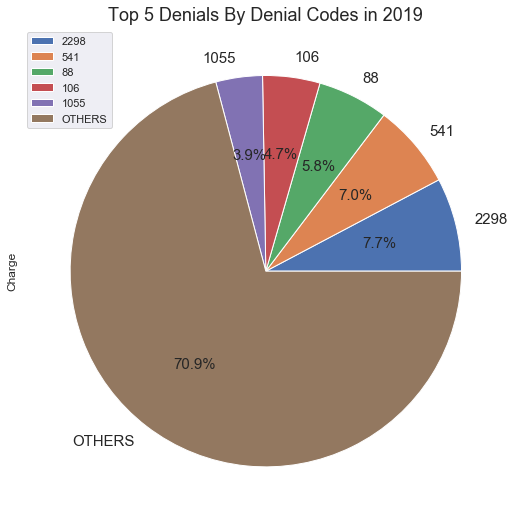

In [86]:
plt.figure(figsize=(15,8))
my_labels = '2298','541','88','106','1055', 'OTHERS'
denial_code_pie.plot.pie(y='Charge', labels=my_labels, autopct='%1.1f%%', legend = False, fontsize=15, 
                               figsize=(18, 9))

plt.title('Top 5 Denials By Denial Codes in 2019', size=18)
plt.savefig('Top 5 Denials By Denial Codes in 2019.png', dpi=300, bbox_inches='tight')
plt.legend(loc='best')
#plt.legend(MyCoding, bbox_to_anchor=(1.05, 1))
plt.show()

In [83]:
df_grp_denial_code2['Total Charge 2019'] = denial_code_table_ext_data['Charge'].sum()
df_grp_denial_code2['% Charge'] = df_grp_denial_code2['Charge']/df_grp_denial_code2['Total Charge 2019']*100
df_grp_denial_code2

,Denial Code,Charge,Total Charge 2019,% Charge
329,2298,3886754.0,35922662.0,10.819783
110,541,3496112.0,35922662.0,9.732330
178,1055,2938660.0,35922662.0,8.180518
27,88,2377180.0,35922662.0,6.617494
38,106,1935245.0,35922662.0,5.387254


### Reasons For High Denial 2019

In [85]:
# filter data by top denial codes

reason_code_table = denial_code_table_ext_data['Denial Code'].isin(['106', '1055', '88', '541', '2298'])
reason_code_table_data = denial_code_table_ext_data.loc[reason_code_table]
reason_code_table_data.tail()

,Year,month,Client,Payor,Denial Code,Charge,Denial Reason Code,Denial Reason Descr,Total Charge 2019
420892,2019,12,Area Ambulance Service,Medicare IA Part B,106,866.0,CO22,Payment adjusted because this care may be cove...,35922662.0
420923,2019,12,Champion EMS,UHC - Medicare,88,814.0,OA18,Duplicate claim/service.,35922662.0
421151,2019,12,Anamosa Area Ambulance Service,BCBS IA - Wellmark,88,891.0,OA18,Duplicate claim/service.,35922662.0
421152,2019,12,Anamosa Area Ambulance Service,BCBS IA - Wellmark,88,892.0,OA18,Duplicate claim/service.,35922662.0
421171,2019,12,West Platte Fire Protection District,Medicare MO Part B,541,0.0,CO109,Claim not covered by this payer/contractor. Yo...,35922662.0


In [73]:
reason_code_table_data['Denial Reason Code'].value_counts()

CO22     5019
PR96     3346
CO109    2337
CO16     1916
OA18     1884
Name: Denial Reason Code, dtype: int64

In [87]:
df_reason_code_table_data = reason_code_table_data[['Denial Reason Code', 'Denial Reason Descr']]
df_reason_code_table_data.sample(10)

NameError: name 'reason_code_table_data' is not defined